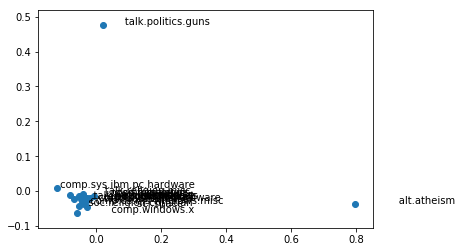

0.826579
0.51372
0.363811
0.326784
0.257613
0.22519
0.211454
0.167697
0.179364
0.0
0.210436
0.163759
0.154701
0.142341
0.148953
0.136874
0.14802
0.132395
0.127134
0.140931
              alt.atheism  :  ['       rec.sport.baseball ' '         rec.sport.hockey '
 '                rec.autos ' '           comp.windows.x '
 '            comp.graphics ' '    comp.sys.mac.hardware '
 '          sci.electronics ' '   soc.religion.christian '
 '             misc.forsale ' '       talk.politics.misc '
 '                sci.space ' ' comp.sys.ibm.pc.hardware '
 '                  sci.med ' '                sci.crypt '
 '          rec.motorcycles ' '       talk.politics.guns '
 '       talk.religion.misc ' '    talk.politics.mideast '
 '              alt.atheism ']


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# string="""	|              alt.atheism |  0.219 | -0.041 | -0.241 | -0.138 |  0.271 | -0.276 |  0.271 |  0.177 |  0.473 |  0.337 | -0.051 | -0.011 | -0.177 | -0.137 | -0.302 |  0.209 |  0.105 | -0.287 | -0.008 |
# 	|       talk.politics.guns | -0.256 |  0.205 |  0.193 | -0.459 |  0.118 |  0.240 | -0.224 | -0.079 |  0.048 |  0.071 | -0.252 |  0.129 | -0.194 | -0.356 | -0.324 | -0.239 |  0.122 |  0.241 | -0.171 |
# 	|                sci.crypt | -0.091 | -0.151 | -0.129 | -0.276 |  0.268 | -0.224 |  0.036 |  0.026 | -0.406 |  0.186 |  0.497 | -0.187 | -0.203 | -0.054 |  0.106 | -0.084 |  0.012 |  0.383 |  0.249 |
# 	|                sci.space |  0.223 |  0.104 | -0.009 | -0.031 | -0.188 |  0.271 |  0.448 | -0.243 | -0.250 |  0.090 | -0.052 |  0.066 |  0.061 |  0.062 | -0.307 | -0.240 |  0.290 | -0.236 |  0.440 |
# 	|                  sci.med |  0.088 |  0.297 | -0.346 |  0.202 | -0.206 |  0.171 | -0.276 |  0.201 |  0.207 |  0.164 |  0.080 |  0.316 | -0.256 |  0.165 |  0.204 | -0.402 |  0.041 | -0.114 | -0.263 |
# 	|    talk.politics.mideast |  0.125 | -0.340 | -0.043 | -0.419 | -0.123 |  0.210 | -0.177 |  0.260 |  0.339 | -0.056 |  0.261 |  0.157 |  0.451 |  0.183 | -0.150 | -0.028 | -0.077 |  0.145 |  0.188 |
# 	| comp.sys.ibm.pc.hardware | -0.332 | -0.098 |  0.177 |  0.363 | -0.289 |  0.367 | -0.073 |  0.334 | -0.346 |  0.139 | -0.063 |  0.138 |  0.260 | -0.255 | -0.149 |  0.196 | -0.097 |  0.105 | -0.082 |
# 	|   soc.religion.christian | -0.313 |  0.064 | -0.051 | -0.084 | -0.276 |  0.106 |  0.017 |  0.153 |  0.184 | -0.041 |  0.114 | -0.434 |  0.208 | -0.277 |  0.345 |  0.026 |  0.461 | -0.253 |  0.154 |
# 	|       rec.sport.baseball | -0.589 | -0.216 | -0.167 |  0.183 |  0.123 | -0.354 |  0.145 | -0.445 | -0.035 |  0.190 | -0.072 |  0.098 |  0.172 | -0.054 |  0.090 | -0.104 |  0.104 | -0.126 | -0.235 |
# 	|          sci.electronics | -0.286 |  0.050 |  0.087 |  0.261 |  0.311 | -0.064 |  0.089 |  0.352 |  0.405 | -0.188 | -0.241 | -0.267 | -0.305 |  0.014 |  0.043 |  0.021 | -0.005 |  0.318 |  0.286 |
# 	|       talk.religion.misc |  0.278 | -0.140 | -0.248 | -0.093 |  0.158 |  0.250 | -0.111 | -0.105 | -0.450 |  0.362 | -0.098 | -0.145 | -0.116 | -0.255 |  0.207 |  0.123 | -0.182 | -0.209 | -0.382 |
# 	|             misc.forsale |  0.111 | -0.216 |  0.039 | -0.116 | -0.093 |  0.206 | -0.422 | -0.431 |  0.017 | -0.070 | -0.469 | -0.274 |  0.051 |  0.292 |  0.065 | -0.028 | -0.280 | -0.031 |  0.195 |
# 	|            comp.graphics |  0.214 | -0.102 |  0.246 |  0.096 | -0.109 |  0.145 |  0.236 | -0.423 |  0.243 | -0.264 |  0.313 | -0.223 | -0.091 | -0.261 | -0.004 |  0.043 | -0.085 |  0.175 | -0.463 |
# 	|         rec.sport.hockey |  0.179 | -0.205 | -0.404 | -0.266 | -0.307 | -0.063 |  0.259 |  0.254 | -0.159 | -0.346 | -0.318 |  0.220 | -0.288 |  0.020 |  0.049 |  0.034 | -0.135 |  0.233 | -0.086 |
# 	|          rec.motorcycles |  0.300 | -0.223 |  0.266 |  0.071 |  0.408 | -0.154 |  0.228 |  0.286 | -0.168 |  0.149 | -0.216 |  0.096 |  0.245 |  0.190 | -0.029 | -0.403 | -0.056 |  0.065 | -0.297 |
# 	|                rec.autos |  0.116 | -0.009 |  0.212 |  0.315 | -0.291 | -0.432 | -0.289 | -0.164 |  0.074 | -0.134 |  0.203 |  0.114 |  0.115 | -0.304 | -0.097 | -0.335 | -0.124 |  0.136 |  0.349 |
# 	|    comp.sys.mac.hardware |  0.088 |  0.253 | -0.341 | -0.039 |  0.469 | -0.112 | -0.209 | -0.059 | -0.223 | -0.438 |  0.146 |  0.205 |  0.183 | -0.108 | -0.270 |  0.223 |  0.013 | -0.234 |  0.040 |
# 	|       talk.politics.misc | -0.065 |  0.191 |  0.306 | -0.156 | -0.355 | -0.349 | -0.061 |  0.226 | -0.131 |  0.028 |  0.085 | -0.312 | -0.182 |  0.302 | -0.331 |  0.155 | -0.305 | -0.166 | -0.194 |
# 	|           comp.windows.x | -0.293 |  0.224 | -0.080 |  0.048 | -0.065 |  0.221 |  0.312 |  0.013 |  0.047 | -0.214 |  0.187 |  0.121 | -0.006 |  0.388 |  0.413 |  0.231 | -0.325 | -0.262 |  0.241 |
# 	|  comp.os.ms-windows.misc |  0.327 |  0.214 |  0.271 |  0.025 |  0.055 | -0.143 | -0.180 | -0.011 | -0.057 |  0.314 |  0.063 |  0.185 | -0.013 |  0.345 |  0.247 |  0.355 |  0.507 |  0.116 | -0.031 |"""


string="""	|              alt.atheism |  1 |  1.000 | -0.022 | -0.065 |  0.037 | -0.018 |  0.026 | -0.382 | -0.025 |  0.013 |  0.159 |  0.043 | -0.319 | -0.083 |  0.013 |  0.080 | -0.232 |  0.104 |  0.036 | -0.203 |  0.047 |
	|       talk.politics.guns |  2 | -0.022 |  1.000 |  0.001 | -0.019 |  0.027 |  0.001 |  0.072 | -0.071 | -0.031 |  0.049 |  0.026 |  0.031 |  0.028 | -0.019 | -0.046 | -0.083 | -0.015 | -0.056 | -0.456 | -0.148 |
	|                sci.crypt |  3 | -0.065 |  0.001 |  1.000 | -0.053 | -0.245 |  0.020 | -0.175 | -0.035 |  0.039 |  0.033 |  0.133 | -0.232 | -0.098 |  0.015 |  0.003 |  0.054 |  0.035 | -0.016 | -0.094 |  0.037 |
	|                sci.space |  4 |  0.037 | -0.019 | -0.053 |  1.000 | -0.109 | -0.032 | -0.036 |  0.051 | -0.107 | -0.298 | -0.080 |  0.010 | -0.116 | -0.007 | -0.003 |  0.012 | -0.015 | -0.155 |  0.048 | -0.018 |
	|                  sci.med |  5 | -0.018 |  0.027 | -0.245 | -0.109 |  1.000 | -0.039 | -0.059 | -0.036 | -0.100 | -0.099 |  0.080 | -0.139 | -0.158 |  0.092 | -0.037 | -0.001 | -0.111 | -0.101 |  0.084 |  0.102 |
	|    talk.politics.mideast |  6 |  0.026 |  0.001 |  0.020 | -0.032 | -0.039 |  1.000 |  0.019 |  0.043 | -0.340 | -0.140 | -0.286 |  0.117 | -0.098 |  0.076 |  0.036 |  0.049 | -0.014 | -0.072 |  0.001 | -0.071 |
	| comp.sys.ibm.pc.hardware |  7 | -0.382 |  0.072 | -0.175 | -0.036 | -0.059 |  0.019 |  1.000 |  0.085 |  0.006 | -0.065 |  0.110 | -0.154 | -0.111 | -0.055 | -0.018 |  0.019 | -0.144 |  0.039 | -0.014 | -0.139 |
	|   soc.religion.christian |  8 | -0.025 | -0.071 | -0.035 |  0.051 | -0.036 |  0.043 |  0.085 |  1.000 |  0.084 |  0.108 | -0.125 | -0.135 | -0.023 | -0.234 | -0.422 | -0.049 | -0.187 | -0.116 |  0.134 | -0.041 |
	|       rec.sport.baseball |  9 |  0.013 | -0.031 |  0.039 | -0.107 | -0.100 | -0.340 |  0.006 |  0.084 |  1.000 | -0.110 |  0.027 | -0.076 | -0.001 | -0.222 |  0.037 |  0.023 | -0.018 | -0.197 | -0.011 | -0.158 |
	|          sci.electronics | 10 |  0.159 |  0.049 |  0.033 | -0.298 | -0.099 | -0.140 | -0.065 |  0.108 | -0.110 |  1.000 | -0.466 | -0.057 | -0.111 |  0.016 | -0.013 | -0.010 | -0.164 | -0.053 |  0.098 | -0.141 |
	|       talk.religion.misc | 11 |  0.043 |  0.026 |  0.133 | -0.080 |  0.080 | -0.286 |  0.110 | -0.125 |  0.027 | -0.466 |  1.000 |  0.156 |  0.076 |  0.081 |  0.127 | -0.408 |  0.059 | -0.102 | -0.186 | -0.004 |
	|             misc.forsale | 12 | -0.319 |  0.031 | -0.232 |  0.010 | -0.139 |  0.117 | -0.154 | -0.135 | -0.076 | -0.057 |  0.156 |  1.000 | -0.051 | -0.006 | -0.111 |  0.020 | -0.139 |  0.018 | -0.000 | -0.105 |
	|            comp.graphics | 13 | -0.083 |  0.028 | -0.098 | -0.116 | -0.158 | -0.098 | -0.111 | -0.023 | -0.001 | -0.111 |  0.076 | -0.051 |  1.000 | -0.069 | -0.079 |  0.097 | -0.163 | -0.006 | -0.116 | -0.149 |
	|         rec.sport.hockey | 14 |  0.013 | -0.019 |  0.015 | -0.007 |  0.092 |  0.076 | -0.055 | -0.234 | -0.222 |  0.016 |  0.081 | -0.006 | -0.069 |  1.000 |  0.020 | -0.189 | -0.029 |  0.022 |  0.046 | -0.242 |
	|          rec.motorcycles | 15 |  0.080 | -0.046 |  0.003 | -0.003 | -0.037 |  0.036 | -0.018 | -0.422 |  0.037 | -0.013 |  0.127 | -0.111 | -0.079 |  0.020 |  1.000 | -0.094 | -0.104 | -0.031 | -0.313 |  0.086 |
	|                rec.autos | 16 | -0.232 | -0.083 |  0.054 |  0.012 | -0.001 |  0.049 |  0.019 | -0.049 |  0.023 | -0.010 | -0.408 |  0.020 |  0.097 | -0.189 | -0.094 |  1.000 | -0.014 |  0.025 | -0.270 | -0.119 |
	|    comp.sys.mac.hardware | 17 |  0.104 | -0.015 |  0.035 | -0.015 | -0.111 | -0.014 | -0.144 | -0.187 | -0.018 | -0.164 |  0.059 | -0.139 | -0.163 | -0.029 | -0.104 | -0.014 |  1.000 | -0.132 |  0.034 | -0.057 |
	|       talk.politics.misc | 18 |  0.036 | -0.056 | -0.016 | -0.155 | -0.101 | -0.072 |  0.039 | -0.116 | -0.197 | -0.053 | -0.102 |  0.018 | -0.006 |  0.022 | -0.031 |  0.025 | -0.132 |  1.000 |  0.039 |  0.013 |
	|           comp.windows.x | 19 | -0.203 | -0.456 | -0.094 |  0.048 |  0.084 |  0.001 | -0.014 |  0.134 | -0.011 |  0.098 | -0.186 | -0.000 | -0.116 |  0.046 | -0.313 | -0.270 |  0.034 |  0.039 |  1.000 | -0.081 |
	|  comp.os.ms-windows.misc | 20 |  0.047 | -0.148 |  0.037 | -0.018 |  0.102 | -0.071 | -0.139 | -0.041 | -0.158 | -0.141 | -0.004 | -0.105 | -0.149 | -0.242 |  0.086 | -0.119 | -0.057 |  0.013 | -0.081 |  1.000|"""

def norm(x):
    return np.sqrt(((x)**2).sum())

# Form the vectors into an array ----------------
string=string.split("\t")
string=string[1:]
table=[]
text=[]
for i in range(len(string)):
    table.append( string[i].split("|"))
    text.append(table[i][1])
    table[i]=table[i][2:-1]
        
#table=table[1:]
# for i in range(len(table)):
#     print(len(table[i]))

# print(table)
arr=np.array(table,dtype=np.float32)

# normalize array
for i in range(20):
    arr[i]=arr[i]/norm(arr[i])
    
# Vizualize with PCA ------------------
pca=PCA(2)
arr2d = pca.fit_transform(arr[:])
ax = plt.gca()
plt.scatter(arr2d[:,0], arr2d[:,1])
for i, txt in enumerate(range(arr2d.shape[0])):
    1
    ax.annotate(text[i], (arr2d[i,0], arr2d[i,1]))
# ax.annotate(text[i],(arr2d[:,0], arr2d[:,1]))

# Vizualize cosine distances ----------------
text=np.array(text)
plt.show()
order_1=np.zeros(19)
for i in range(0,arr.shape[0]):
#     x=(arr[0]-arr[i])
    order_1[i-1]=(((arr[0]-arr[i])**2).sum())
    print(norm(arr[9]-arr[i]))
    
    
print(text[0], ": ", text[np.argsort(order_1)])

In [28]:
ax.annotate("1",(1,1))
plt.show()

In [83]:
x=arr[0]-arr[19]
x

array([ -1.90000000e+01,   9.53000009e-01,   1.26000002e-01,
        -1.01999998e-01,   5.49999997e-02,  -1.19999997e-01,
         9.70000029e-02,  -2.43000001e-01,   1.60000008e-02,
         1.71000004e-01,   3.00000012e-01,   4.70000021e-02,
        -2.14000016e-01,   6.60000071e-02,   2.54999995e-01,
        -6.00000471e-03,  -1.12999991e-01,   1.60999998e-01,
         2.29999982e-02,  -1.21999994e-01,  -9.53000009e-01], dtype=float32)

In [82]:
np.linalg.norm(x, ord=2)

6.0740009e+09

In [95]:
norm(x)

In [88]:
np.argsort(order_1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [89]:
order_1

array([   3.6202476 ,    6.51121473,   11.52442837,   18.57984543,
         27.75429726,   40.15172195,   51.97237396,   66.6916275 ,
         83.30101013,  102.94940186,  124.89035797,  146.88648987,
        171.46603394,  198.15112305,  228.71292114,  258.03421021,
        291.52441406,  327.59332275,  363.21957397])